# Nonlinear dynamics of heart and brain

### Table of contents <a class="anchor" id="TOC"></a>
* [Introduction](#introduction)  
* [Excitable cells and the FitzHugh Nagumo model](#excitable-cells-and-fitzhugh-nagumo-model)
   * [Action Potential Generation](#action-potential-generation)
   * [The FitzHugh Nagumo Model](#the-fitzhugh-nagumo-model)
* [Cardiac Toy Model](#cardiac-toy-model)
    * [Exercise 1](#exercise-1)
* [Brain Toy Model](#brain-toymodel)
    * [Exercise 2](#exercise-2) 
* [Synchronisation and Entropy Measures](#synchronisation-and-entropy-measures)
    * [Kuramoto Order Parameter](#kuramoto-order-parameter)
    * [Coherence](#coherence)
    * [Pattern Entropy](#pattern-entropy)
    * [Exercise 3](#exercise-3)
* [References](#references)

### Introduction <a class="anchor" id="introduction"></a>
Heart and brain are both organs that function through a collective and coordinated response of their cells, mediated by electrical signaling and activity propagation. When activated, their cells generate electrical traces called action potential that propagate the signal to connected cells, generating specialized activity patterns that serve their distinct functions.

However, despite these similarities in their fundamental mechanics, the emergent emergent dynamics of these organs could not differ more: 
In the myocardium, a coherent traveling wave of action potentials ensures coordinated contraction; in the cerebral cortex, distributed, irregular spiking underlies the processing of sensory information and the generation of behavior.  Interestingly, while the heart functions when the cells are excited in synchrony along the travelling wavefront of action potentials, it fails when the breakdown of the traveling front leads to irregular activation. Conversely, distributed activity is a feature of healthy brain dynamics, while excessive synchrony is associated with low information capacity and epilepsy. Thus, collective dynamics that define function in one organ define failure in the other. 

Using a nonlinear dynamics perspective [[1](https://doi.org/10.1007/978-1-4612-3118-9)]<a class="anchor" id="ref_1"></a> [[2](https://doi.org/10.1016/j.physrep.2014.05.002)]<a class="anchor" id="ref_2"></a>, [[3](https://doi.org/10.1103/RevModPhys.78.1213?_gl=1*61rq1e*_ga*MTA5NDQzODUxMC4xNzE2Mzk2ODQ2*_ga_ZS5V2B2DR1*MTczNzg5NzE1Ni40MC4wLjE3Mzc4OTcxNTYuMC4wLjI3MjM0MjI3NQ..)]  <a class="anchor" id="ref_3">   [[4](https://doi.org/10.1016/j.cnsns.2020.105275)]<a class="anchor" id="ref_4"></a> , both systems can be described to a leading order as excitable media. In an excitable medium, depending on the properties of the single cells, network archtecture, input pattern, and coupling mechanism, either non-synchronous or synchronous dynamics can emerge. Here, we use the same basic model to simulate cardiac and neural electrical activity at 
the single-unit level. We extend the single-cell models of action potential generation to a model of organ-level function by taking into account cellular coupling and specifics of network architecture and input pattern in the heart and brain. Subsequently, we show how the different network structure and input pattern support synchronous or irregular collective dynamics (e.g. bidirectional, spatially arranged coupling and periodic input 
enables synchronized traveling waves propagation while directed, non-local connections, and noisy distributed input facilitate asynchronous dynamics).

Then, we show how varying a control parameter a population of coupled excitable units can cross the transition between a synchronized state and an asynchronous state or vice versa, which corresponds to the transition from function to malfunction in the organ dynamics.

We analyze the collective dynamics in both models using synchronisation and entropy measures to show how in the reductionist brain-like model a healthy state correlates with low synchronisation and high entropy levels while in the heart-like model the opposite occurs.

## Excitable cells and FitzHugh-Nagumo model  <a class="anchor" id="Excitable-cells-and-FitzHugh-Nagumo-model"></a>

### Action potential generation <a class="anchor" id="Action-Potential-Generation"></a>
Despite the drastic differences in organ structure and function, the generation of electrical activity in neurons and cardiomyocytes follows similar voltage traces (action potentials) and
occurs, in first approximation, by the same basic ion movements across their membranes.

At rest, a negative membrane potential of -70 to -90 mV arises from the characteristic ionic composition of the cytoplasm - high intracellular $\mathrm{K^{+}}$, and low intracellular $\mathrm{Na^{+}}$ and $\mathrm{Ca^{2+}}$. These concentrations are maintained by ion pumps such as the $\mathrm{Na^{+}}/\mathrm{K^{+}}$-ATPase and by ion channels that allow selective ionic diffusion.  

Electrical or chemical input from coupled cells can perturb this resting state and depolarize the membrane, shifting the membrane potential toward less negative values.  
When depolarization crosses a threshold (around -50 mV), voltage‑gated $\mathrm{Na^{+}}$ channels open, allowing $\mathrm{Na^{+}}$ ions to rapidly flow inward along their electrochemical gradient. This flow produces the initial fast upstroke of the action potential.

Subsequently, 
$\mathrm{Na^{+}}$‑channel inactivation, together with the slower activation of voltage‑gated $\mathrm{K^{+}}$ channels, repolarizes the membrane, returning the membrane potential toward its resting negative value. These dynamics generate a refractory period, during which additional stimuli cannot elicit another action potential, and the $\mathrm{Na^{+}}/\mathrm{K^{+}}$ pump gradually restores the ionic gradients.

The successive phases of depolarization and repolarization characterize the action potential in both the heart and the brain. This behavior arises from the intrinsic ability of the cell to remain quiescent under small perturbations yet respond explosively once a threshold is crossed. Such highly nonlinear, threshold-dependent dynamics are shared by cardiomyocytes and neurons and are referred to as excitability.

Despite the common ionic mechanism, specific features of the action potential are tuned to meet organ-specific functional demands.  In the heart, for example, prolonged action potentials relative to intercellular coupling delays promote near‑synchronous activation of cardiomyocytes, ensuring coherent signal propagation.

### The FitzHugh-Nagumo model  <a class="anchor" id="FitzHugh-Nagumo-Model"></a>
The generation of action potentials can be modeled at different levels of abstraction, reflecting a trade‑off between biological realism and analytical tractability. On the one hand, detailed, ionic models explicitly describe the flow of each ion species across the cell membrane. On the other hand, reduced, phenomenological models condense these electrical processes into a few variables, enabling analytical insights into general principles of excitability.

An influential low-dimensional model of excitability is the Fitzhugh-Nagumo (FHN) model, that couples a fast activator variable to a slower recovery variable, producing an action-potential-like response with a refractory period [[5](https://doi.org/10.1016/S0006-3495(61)86902-6)]<a class="anchor" id="ref_5 "></a> [[6](https://doi.org/10.1109/JRPROC.1962.288235)]<a class="anchor" id="ref_6 "></a>  [[7](https://doi.org/10.1007/978-3-030-91032-7)]<a class="anchor" id="ref_7 "></a>. 

Given an excitable cell identified by the subscript $i$, the model characterises the changes $\frac{d}{dt}$ in its membrane potential $V_i$ and a slow recovery variable $W_i$.

<a class="anchor" id="equation_1_ff"></a>
\begin{align}
    \frac{dV_i}{dt} &= a V_i (V_i-b)(1-V_i) - W_i + I_i + \eta_i\\
    \frac{dW_i}{dt} &= \epsilon (V_i-W_i)
\end{align}

The membrane potential $V_i$ summarises the effects of the fast ionic currents (sodium) while the recovery variable $W_i$  summarises all the slow ionic processes (ion channel inactivation). 

The parameter $b$ controls the excitation threshold needed to generate an AP: the higher $b$ is, the stronger the external input needs to be to trigger activity.

The parameter $a$ controls the sharpness and duration of the AP: as $a$ increases, the duration of the depolarization phase increases, while the recovery period remains unchanged. 
 
The parameter $\epsilon$ determines the timescale separation between membrane potential and recovery variable. Decreasing $\epsilon$ results in a longer overall activity, lengthening both the depolarization phase and the recovery period. 

$\eta_i$ is uncorrelated white noise with standard deviation $\sigma$.
 
Finally, $I_i$ represents the external input, typically given by the coupling with other cells and external stimuli (i.e. the planar wave initiated by pacemaker cells).

Here we use the FHN model to reproduce the excitable properties of cariomyocytes and neurons, as it describes in a general way how action potentials arise from the interaction of fast activation and slow recovery processes.

## Cardiac Reductionist Model <a class="anchor" id="Cardiac-Toy-Model"></a>
The heart pumps oxygenated blood to the body and deoxygenated blood to the lungs. 
This vital function relies on the coordinated contractions of cardiomyocytes. 
The tight local, bidirection coupling of these cells via gap junctions enables locally synchronized activation with emergent traveling waves, thereby enabling efficient pumping. 
The cell-to-cell signaling together with a long-lasting action potential ($\approx 200 $ ms) and a pronounced refractory period generates a coherent traveling wavefront. Regular heartbeats are induced by a periodic stimulus from the sinoatrial nodes, the pacemaker cells.

From a reductionist, nonlinear dynamics perspective, healthy heart dynamics arises from a periodic stimulus to a quasi-two-dimensional sheet of strongly and bidirectionally coupled cells. To mimic this setting, we use a Fitzhugh-Nagumo model with a low internal noise level and local diffusive coupling on a 2D lattice with $N$ lattice sites per dimension. We define the input current of each cell of the FHN model $I_i$ as $I_i=-D_v \sum_{j} J_{ij}V_j$, where $D_v$ is the diffusion coefficient, and $J_{ij}$ a local couping matrix. 

The coupling matrix $J_{ij}$ is defined as $J_{ii}=-3$, $J_{ij}=0.5$ if j is nearest neighbour of $i$, $J_{ij}=0.25$ if $j$ is a diagonal neighbour of $i$, and $J_{ij}=0$ otherwise. 



Imports:

In [1]:

import matplotlib.gridspec as gridspec
import os, sys
rootpath = os.path.join(os.getcwd(), '..')
codepath = os.path.join(os.getcwd(), '../codebase') 
sys.path.append(rootpath)
sys.path.append(codepath)
from codebase.FHN_model import * 
from codebase.FHN_analysis import * 
from codebase.FHN_plots import *

We initialise the 2D FHN heart-like 2D lattice by setting the **organ** parameter of the **FHN_model** class to **heart** . If the parameters $a, b, e, D_v$, and sigma are not initialised in the class declaration they are set to sensible default values.
If not otherwise stated, N -the number of units per dimension- is set to 100. The parameter $p$ correspoonds to the probability of a cell to be a strctural defect, i.e. to not be conductive, and is set to $p=0$ by default to simulate healthy cardiac function. The **adjacency_seed** parameter sets the seed to generate a random matrix of defect units when $p \neq 0$.

A periodic external stimulus, whose period is set by **stimulus_period**, exciting the left-most column of units models the rhythmic activation of the cardiac tissue generated by pacemaker cells.

The parameter **sigma** regulates the standard deviation of the noise included in the system. It is kept by default to $0.0001$ to avoid initiating noise-induced action potentials which would create sources of activity other than the traveling wavefront induced by the external stimulus.

In [2]:
## initialisation of the model:
# prints the parameters that can be passed to the model and their (default) values
heart_toymodel = FHN_model(
                 organ='heart',
                 # change N other parameters to non-default values here
                 N=70,

                 adjacency_seed=1000,
                 stimulus_period=600)             

{'organ': 'heart', 'N': 70, 'a': 3, 'b': 0.05, 'e': 0.01, 'sigma': 0.0001, 'adjacency_seed': 1000, 'p': 0, 'Dv': -0.04, 'stimulus_period': 600}


In [3]:
## Integration of the model
# n_stored_states defines the number of time points at which the solution is stored
# T is the duration of the simulation
heart_toymodel.run_simulation(T=1200, n_stored_states=1200)

The time evolution of all the $V_i$ variables is stored in the attribute **vs** of *heart_toymodel*, the time evolution of the $W_i$ variables is stored in the attribute **ws**, and the timesteps at which the states of the system are saved are stored in the attribute **ts**. For instance, by calling "print(heart_toymodel.ts)", you can verify that the run_simulation function has saved correctly states of the system for t=1,2,3,...,1200. 

We visualize the results of the simulation by plotting some of the saved states or the overall activity of the system (obtained as the sum of all the $V_i$) as a function of time.

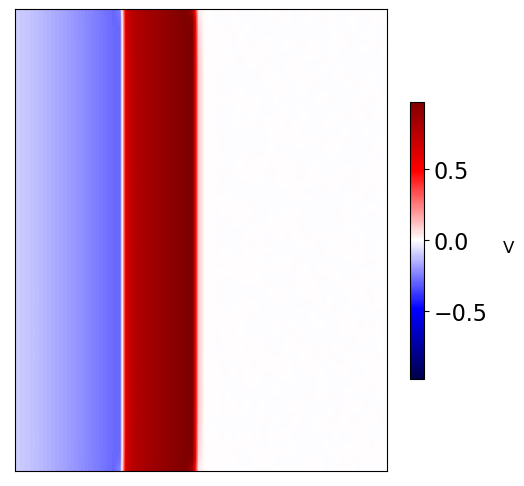

In [4]:
# Plotting one frame of the solution of the membrane potential
# state_index is the index of the state that is plotted
fig1, ax1 = plt.subplots(figsize=(6, 6), facecolor='none')
heart_plot(fig1, ax1, heart_toymodel, state_index=200)

(<matplotlib.image.AxesImage at 0x23ab89ddcd0>,
 <matplotlib.colorbar.Colorbar at 0x23ab62480d0>)

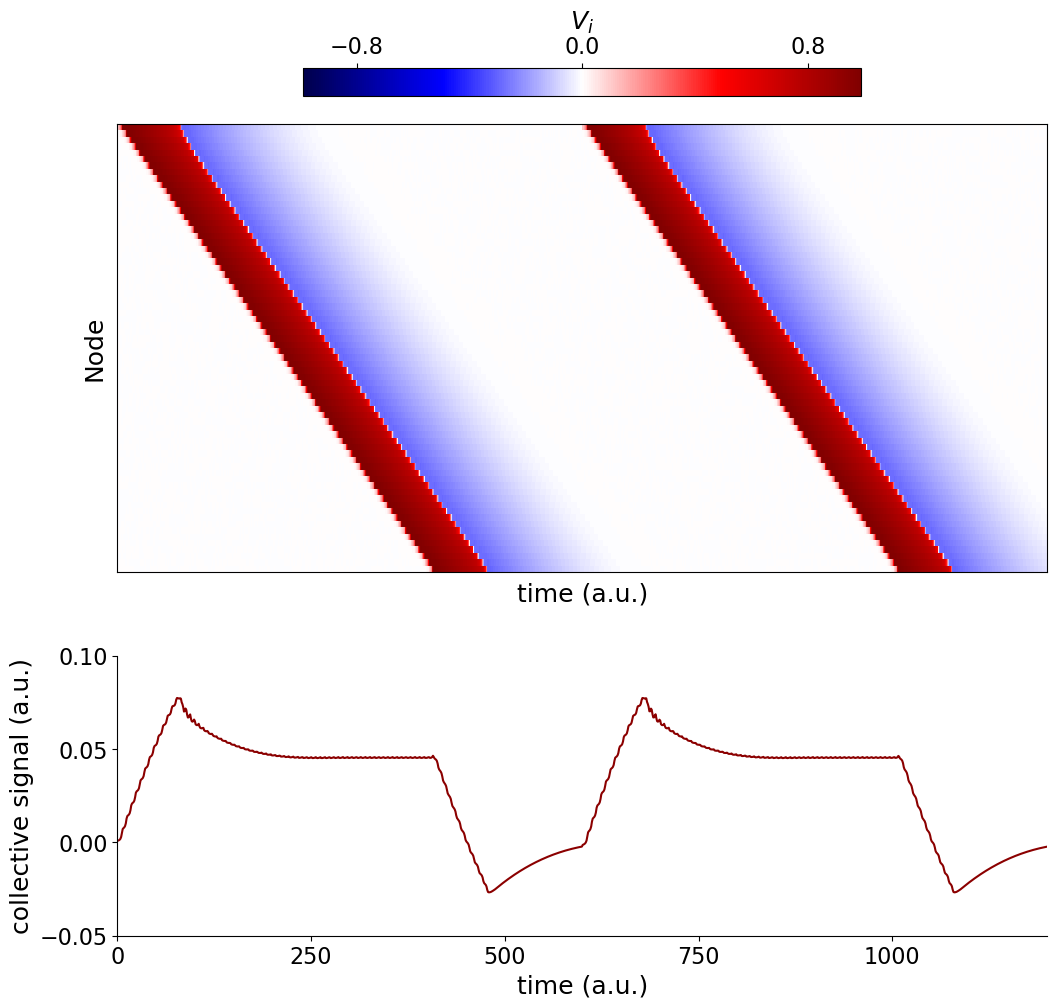

In [5]:
# Here we plot the transmission of the signal across time over one row of the grid
# plot_from is the frame number from which the plot starts
# Moreover we plot the collective activity at each timestep given by \sum_i V_i
fig2 = plt.figure(figsize=(12, 12), facecolor='none')
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])

axkymo = fig2.add_subplot(gs[0])
axcollective = fig2.add_subplot(gs[1])

plot_kymograph_and_collective_signal(fig2, axkymo, axcollective, heart_toymodel,plot_from=0)

In the heart, interruptions of the synchronized action potential wavefront can lead to spatially uncoordinated (arrhytmias) or absent contractions (asystole), resulting in inefficient or absent blood pumping. 
Such interruptions can arise from local defects, which can originate from the buildup of excessive connective tissue through the overproliferation of the ECM and fibroblasts (fibrosis) or lesions of the cardiac tissue (scar tissue). 

To imitate pathological cardiac conditions in the 2D FHN lattice model, we turn each lattice unit into a non-conducting defect with probability $p$ [[8](#ref_8)]<a class="anchor" id="ref_8"></a> [[9](#ref_9)]<a 
class="anchor" id="ref_9"></a> [[10](#ref_10)]<a class="anchor" id="ref_10"></a>. These structural microscopic defects are a simple model of fibrosis, scar tissue, or any localized impediment to activity spread that can give rise to cardiac arrhythmia.  The collective activity consequently changes from a coherent traveling wave with regular single-unit activity at $p=0$ to a noisy trace at $p=0.5$. In the noisy regime, the activity is neither coordinated across the lattice nor driven by the pacemaker stimulus but displays self-sustained spiral waves.
When $p$ approaches the percolation threshold ($p_c\approx0.59$), the conductive network fragments, propagation ceases, and the system becomes silent, producing only asynchronous background noise.


In [ ]:
#NB: system size N is increased here compared to above in order to witness the noisy regime
arrhythmia_toymodel = FHN_model( 
                  
                 organ='heart',
                 p=0.5,
                 N=150,
                 adjacency_seed=1000,
                 stimulus_period=1300)          

{'organ': 'heart', 'N': 150, 'a': 3, 'b': 0.05, 'e': 0.01, 'sigma': 0.0001, 'adjacency_seed': 1000, 'p': 0.5, 'Dv': -0.04, 'stimulus_period': 1300}


In [7]:
# Integration of the model
arrhythmia_toymodel.run_simulation(T=1300, n_stored_states=1300)

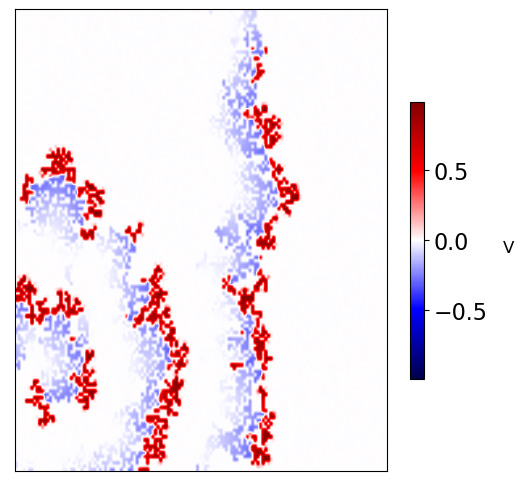

In [8]:
# Plotting one frame of the solution of the membrane potential
# state_index is the index of the frame that is plotted
fig1, ax1 = plt.subplots(figsize=(6, 6), facecolor='none')
heart_plot(fig1, ax1, arrhythmia_toymodel, state_index=1300)

(<matplotlib.image.AxesImage at 0x23ac2104a00>,
 <matplotlib.colorbar.Colorbar at 0x23ac2229610>)

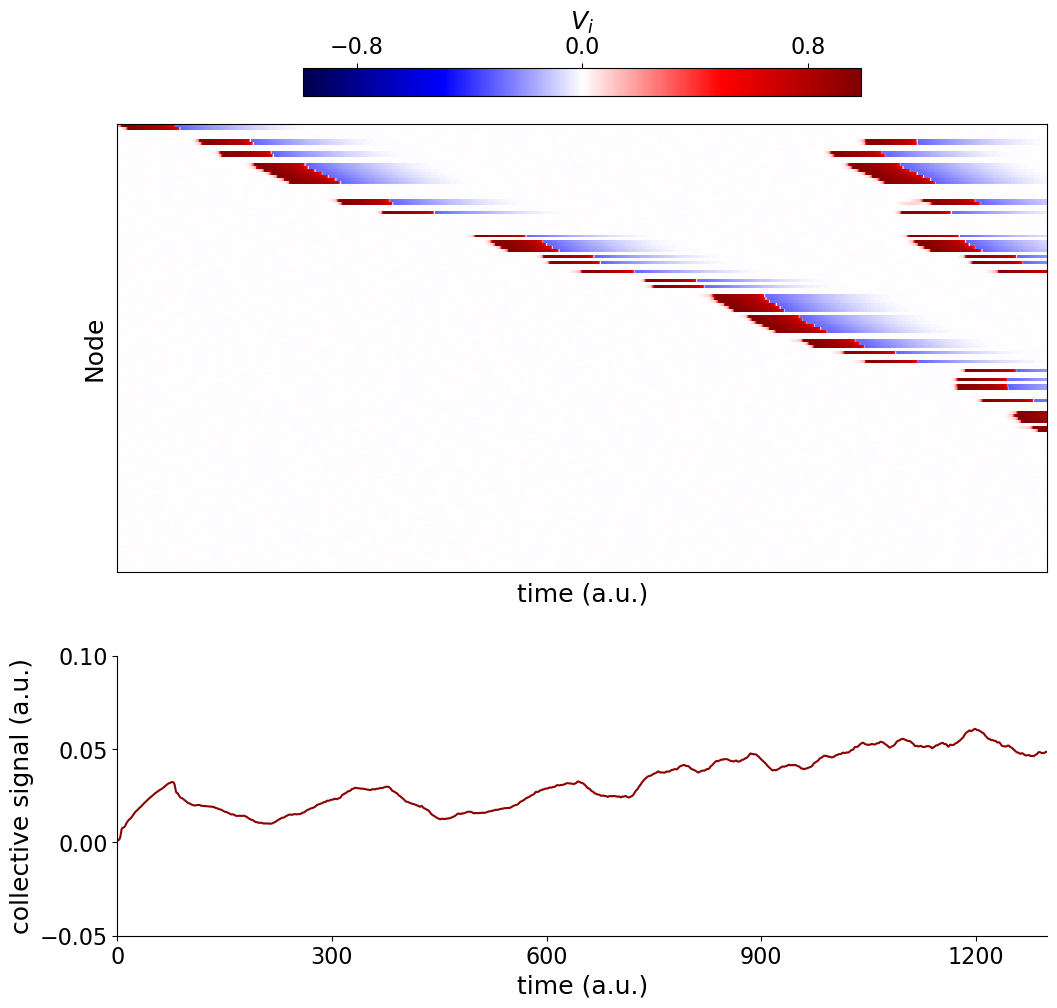

In [9]:
# Here we plot the transmission of the signal across time over one row of the grid
# plot_from is the state number from which the plot starts
# Moreover we plot the collective activity at each timestep given by \sum_i V_i
fig2 = plt.figure(figsize=(12, 12), facecolor='none')
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])

axkimo = fig2.add_subplot(gs[0])
axcollective = fig2.add_subplot(gs[1])

plot_kymograph_and_collective_signal(fig2, axkimo, axcollective, arrhythmia_toymodel,plot_from=0)

### Exercise 1 <a class="anchor" id="Exercise 1"></a>

The following exercise (as all the exercises provided in the notebook) are suggested as a starting point to think about the model and play with its parameters. Feel free to skip some of them if they are too easy or come up with your own investigation of the model.


**a)** By changing the **p** parameter of the model try to get asystole. What does the collective activity look like?

**b)** Verify that for different spatial realisations of the diffuse fibrosis  (i.e. changing the **adjacency_seed** parameter of the model) the transitions to arrhythmia and to asystole happen at different values of **p**. Why is that so? Hint: plot the 2D locations of the fibrotic conduction blocks using "plt.imshow(heart_toymodel.block)".

**c)** Change the **stimulus_time** parameter of the model to increase or decrease the pacemaking period. Is there an effect on the onset of arrhythmia? How does the collective signal change?

**d)** Increase the **sigma** parameter of the model. At what value of **sigma** does the synchronised collective activity of the model for $p=0$ break? Why? Hint: **sigma** is the standard deviation of the noise and the cells are excitable...

**e)** Increase the diffusion constant **Dv** in the arrhythmic regime. What happens in this case? Is persistent activity still generated? Why?


## Brain Toy Model <a class="anchor" id="Brain-Toy-Model"></a>

Like the heart, the brain relies on electrically excitable cells. However, in contrast to the heart, the brain's neurons should not all be active at the same time. Synchronous firing reduces the variability and independence of neural responses, leading to a decrease in entropy as neural activity becomes more predictable and thus carries less information. 
Consequently, when excessively synchronous firing occurs, the population encodes about the same information as a single neuron, impairing information processing. 
Instead, the brain requires distributed, irregular activation of its neurons to support complex information processing. To that end, the neurons fire very short (approx. 1 millisecond) action potentials (APs) that travel via a specialized network to hundreds or thousands of other neurons - which in turn are only activated if they receive sufficient APs within a short period of time, so that the summed membrane voltages crosses the neuron's firing threshold. 
This combination of short APs, relatively long conduction delays (several milliseconds), the non-local connectivity, and the threshold function for firing all support a de-synchronized activation of the neural network. Hence, altogether, the neural network is designed for distributed, efficient computation.

Healthy brain dynamics may be seen as the result of irregular stimuli to a complex, sparse, and directed network of weak connections. Here, we model this with a directed Erdős-Rényi graph of FitzHugh-Nagumo units. To demonstrate how network architecture and input pattern shape emergent dynamics, we purposely choose the same single-cell model as in the cardiac model above, including the same average degree $\langle k\rangle =8$. The coupling neuron of $i$ with the other neurons $j$ is set to be $J_{ij}=\frac{m}{k}$ where $J_{ij}$ is the adjacency matrix of the network and $m \geq 0$ sets the strength of the excitatory connections.

The variable $m$ directly determines the system's synchronisation level and is thus varied to obtain a phase transition from the healthy (distributed, irregular --- low $m$) to pathological (synchronous -- high $m$) state.

We let a moderately noisy input take the role of varying stimuli:
the parameter **sigma** --- the standard deviation of the noise in the system --- is it fixed to $0.50$ to ensure that noise-induced action potentials can occur. Here, they are the only source of activity, since there is no external stimulus as in the heart model, if **sigma** is too low to cause action potentials at all the system stays silent.

In [ ]:
# model initialisation
# Once again, the parameter of the FHN model are set my default to the values used in the paper
# m , if not otherwise stated, is set to 0.005 (healthy state)
# N, if not otherwise stated, is set to 1000
# sigma, if not otherwise stated, is set to 0.05
# k, if not otherwise stated, is set to 8
# The adjacency_seed sets the seed for the erdos renyi graph generation
brain_toymodel = FHN_model( 
                 organ='brain',            
                 # change parameters to non-default values here

                 adjacency_seed=1000,
                 )  

{'organ': 'brain', 'N': 1000, 'a': 3, 'b': 0.05, 'e': 0.01, 'sigma': 0.008, 'adjacency_seed': 1000, 'm': 0.005, 'k': 8}


In [11]:
## Integration of the model
# n_stored_states defines the time points at which the solution is stored
# T is the duration of the simulation and is set by default to 3000
brain_toymodel.run_simulation(n_stored_states=3000)

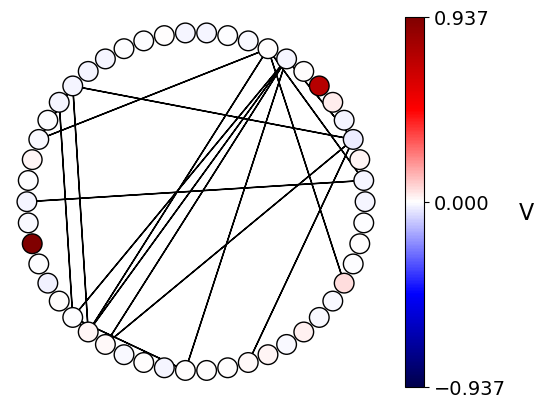

In [12]:
# Plotting one frame of the solution of the membrane potential for a subset of neurons
# neurons are plotted as equally distributed on a circle and colored acconding to their membrane potential
# The connections within neurons are plotted in black
# state_index is the index of the state that is plotted
# subset_size controls how many (randmly selected) neurons to show 
state_index=100
fig3, ax3 = plt.subplots(figsize=(6, 6), facecolor='none')
plot_graph_on_circle(brain_toymodel.vs[state_index,:], brain_toymodel.J, ax3, subset_size=50)

(<matplotlib.image.AxesImage at 0x23ac2d5b6a0>,
 <matplotlib.colorbar.Colorbar at 0x23ac2ccf0a0>)

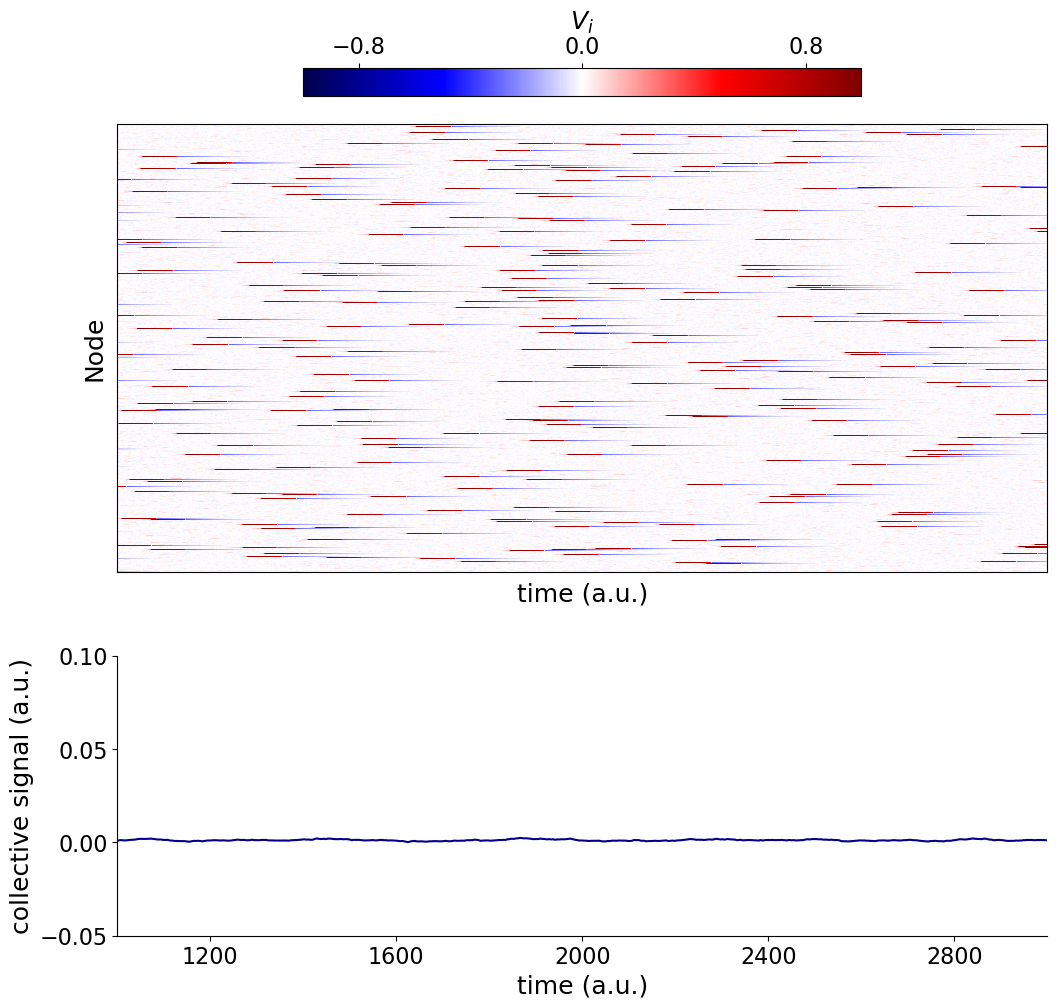

In [13]:
# Here we plot the kymograph of the membrane potential over time
# plot_from is the index of the state at which the plot starts, corresponds to the end of equilibration
# Moreover we plot the collective activity at each timestep given by \sum_i V_i

fig4 = plt.figure(figsize=(12, 12), facecolor='none')
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])

axkymo = fig4.add_subplot(gs[0])
axcollective = fig4.add_subplot(gs[1])

plot_kymograph_and_collective_signal(fig4, axkymo, axcollective, brain_toymodel)

### Exercise 2 <a class="anchor" id="Exercise 2"></a>
**a)** How does the collective activity of the healthy brain model differ from the one of the heart toy model? Why? Hint: think about the heart's and the brain's respective functions.

**b)** Try to get a transition from a healthy state to an epileptic-like seisure by playing around with the parameter **m** of the model. How does the collective activity look like in this case? Does it remind you of some properties of the healthy cardiac model?

**c)** Change the parameter of the model **k** which changes the mean degree of the network. Does the value of **m** at which the transition to synchrony occurs change as well?

**d)** Lower the value of **sigma** of one order of magnitude. What happens to the collective activity of the system?

## Synchronization and entropy measures <a class="anchor" id="Synchronization-and-entropy-measures"></a>

To characterize the phase transition from healthy to pathological states in both organs we employ three different order parameters:
* Kuramoto order parameter
* Coherence
* Pattern entropy

### Kuramoto order parameter <a class="anchor" id="Kuramoto-order-parameter"></a>

The degree of synchronization over time is quantified using the real part of the Kuramoto order parameter [[11](https://doi.org/10.1007/BFb0013365)]<a class="anchor" id="ref_11"></a> :
\begin{align}
r(t)e^{i \psi(t)}=\frac{1}{n}\sum_{k=1}^n e^{i \theta_k(t)}.
\end{align}
To compute $\mathcal{H}[V_k]$, we first take the Fourier transform of $V_k$, double the positive frequencies, set the negative frequencies to zero, and leave the zero-frequency component unchanged. Then, the resulting signal is transformed back into the time domain to obtain the analytic signal, whose imaginary part is $\mathcal{H}[V_k]$. The instantaneous phase of the signal is extracted as  
$\theta_k(t)=\arg(i\mathcal{H}[V_k](t)+V_k(t))$.

By averaging $r(t)$ over time, we obtain the global synchronization level: 

$R=\langle r(t)\rangle_t$

In the case of the 2D lattice, for $p=0$  we expect sites belonging to the same column to be perfectly synchronized as they are simultaneously reached by the periodic excitation, which travels horizontally. 
Therefore, we quantify synchronization column-wise: for each column $j$, we calculate $R_j$ disregarding the contribution of the defects and extract the total order parameter as 

$R=1/\sqrt{N}\sum_{j=1}^{\sqrt{N}} R_j(t)$.  




In [14]:
## Calculation of the order parameter R for the heart model
# Note: This returns R for the simulation of heart_toymodel with the parameters as defined above
# if p=0 it is close to 1 signaling maximum degree of synchronisation
# this corresponds to efficient blood pumping
# transient_length correspond to the index of the state at which equilibration end and from which we calculate the order parameter
# The latter is discarded in the calculation of the order parameter
kuramoto_heart= FHN_kuramoto(heart_toymodel, transient_length=100)
kuramoto_heart.kuramoto()
print(f"R={kuramoto_heart.R}")

R=0.9999186396598816


In [15]:
# Calculation of the order parameter R for the brain model
# Note: This returns R for the simulation of brain_toymodel with the parameters as defined above
# For m=0.005 it is elevated signaling a low degree of synchronisation
# This corresponds to efficient information processing
kuramoto_brain= FHN_kuramoto(brain_toymodel, transient_length=1000)
kuramoto_brain.kuramoto()
print(f"R={kuramoto_brain.R}")

R=0.07657568901777267


### Coherence <a class="anchor" id="Coherence"></a>

The coherence order parameter $R_V$ is calculated to quantify the degree of synchrony of the membrane voltages $V_j$  by comparing global population fluctuations to individual variability [[12](https://doi.org/10.1162/08997660151134280)]<a class="anchor" id="ref_12"></a> . 

Letting $\overline{V}(t)=\frac{1}{N}\sum_{j=1}^NV_j(t)$ be  population mean and denoting by $\langle \dots\rangle$ the average over a time window then $R_V(t)$ is given by the ratio of the global variance of the population mean and the average variance within single sites: 
\begin{align}
    R_V(t)=\frac{\sqrt{\langle \overline{V}(t)^2\rangle-\langle\overline{V}(t)\rangle^2}}{\sqrt{\frac{1}{N}\sum_{j=1}^N\left(\langle V_j^2(t)\rangle -\langle V_j(t)\rangle ^2\right)}}
\end{align}
Further averaging over time we obtain a global order parameter quantifying the degree of synchrony in the system. Concerning the heart simulation, $R_V$ is calculated column by column and then averaged in accordance with the procedure for the Kuramoto order parameter.

In [16]:
# Calculation of the coherence for the heart model
# Note: This returns C_V for the simulation of heart_toymodel with the parameters as defined above
# transient_length correspond to the index of the state at which equilibration end and from which we calculate the order parameter
# The coherence is calculated of for t>transient_length
# The coherence is elevated for p=0 signaling a high degree of synchronization
coherence_heart=FHN_coherence(heart_toymodel, transient_length=100)

coherence_heart.coherence()
print(f"C_V={coherence_heart.coherence}")

C_V=0.9990618228912354


In [17]:
# Calculation of the coherence for the brain model
# Note: This returns C_V for the simulation of brain_toymodel with the parameters as defined above
# The coherence is close to 0 for m=0.005 signaling a low degree of synchronisation
coherence_brain=FHN_coherence(brain_toymodel, transient_length=1000)

coherence_brain.coherence()
print(f"C_V={coherence_brain.coherence}")

C_V=0.03380643203854561


### Pattern Entropy <a class="anchor" id="Pattern-Entropy"></a>

We use a binary representation of the system's time evolution to quantify entropy. 

First, we define binary activity variables $A_i(t)$ from the time evolution of each $V_i$, considering a node active when its membrane potential exceeds a threshold $V_\mathrm{thres}$. We set $V_\mathrm{thres}=0.08>b$ for both organs so that an active node is in the depolarization phase of the action potential.
Next, we consider smaller subsets of $A_i(t)$ at fixed $t$. 
For each subset, we count over time the number of occurrences $n_i$ of each of the $\mathcal{N}$ possible binary patterns it can store and define the probability of the $i^{th }$ pattern as $p_i=(n_i+1)/(T+\mathcal{N})$, where $T$ is the total number of time-steps. 

This definition assumes a uniform probability distribution for patterns that are possible but not observed, thus counteracting the bias introduced by observing only a small number of patterns. 
Finally, we quantify the information content in the system by computing the Shannon entropy as $H=-\sum_{i}p_i \log_2 (p_i)$. 

In [18]:
# Calculation of the entropy for the heart model
# transient_length correspond to the index of the state at which equilibration end and from which we calculate the order parameter
# The entropy is low for p=0 signaling a high degree of synchronisation

entropy_heart=FHN_entropy(heart_toymodel, transient_length=100)
entropy_heart.entropy()
print(f"H={entropy_heart.entropy}")

H=0.455940842628479


In [19]:
# Calculation of the entropy for the brain model
# The entropy is high for m=0.005 signaling a low degree of synchronisation
entropy_brain=FHN_entropy(brain_toymodel, transient_length=1000)
entropy_brain.entropy()
print(f"H={entropy_brain.entropy}")

H=0.3231363892555237


### Exercise 3 <a class="anchor" id="Exercise 3"></a>
**a)** Calculate the order parameters for the arrhythmic heart and the epileptic brain. What is their value compared to the one of the corresponding healthy state? What's their value compared to the opposite organ's healthy state?

**b)** By carrying out other simulations around the phase transition for both organs (**p** around 0.5 in the heart and **m** around 0.1 in the brain), try to understand whether the transition is discontinuous (i.e. the other parameters "jump" from a value to another abruptly even for values of **p** or **m** very close to one another) or continuous (the order parameters increase/decrease smoothly at the transition).

**c)** What entropy value would you expect from a cardiac model in the asystole regime? Why? Check your guess.

## References <a class="anchor" id="references"></a>


[[1](#ref_1)] Glass, L., Hunter, P., & McCulloch, A. (2012). Theory of Heart: Biomechanics, Biophysics, and Nonlinear Dynamics of Cardiac Function. _Springer Science & Business Media._

[[2](#ref_2)] Qu, Z., Hu, G., Garfinkel, A., & Weiss, J. N. (2014). Nonlinear and stochastic dynamics in the heart. _Physics Reports, 543(2),_ 61–162.

[[3](#ref_3)] Rabinovich, M. I., Varona, P., Selverston, A. I., & Abarbanel, H. D. I. (2006). Dynamical principles in neuroscience. _Rev. Mod. Phys., 78,_ 1213–1265. 

[[4](#ref_4)] Barrio, R., Coombes, S., Desroches, M., Fenton, F., Luther, S., & Pueyo, E. (2020). Excitable dynamics in neural and cardiac systems. _Communications in nonlinear science & numerical simulation, 86,_ 105275.

[[5](#ref_5)] FitzHugh, R. (1961). Impulses and Physiological States in Theoretical Models of Nerve Membrane. _Biophysical Journal, 1_(6), 445–466. 

[[6](#ref_6)] Nagumo, J., Arimoto, S., & Yoshizawa, S. (1962). An Active Pulse Transmission Line Simulating Nerve Axon. _Proceedings of the IRE, 50_(10), 2061–2070.


[[7](#ref_7)] Datseris, G., & Parlitz, U. (2022). Nonlinear Dynamics: A Concise Introduction Interlaced with Code. doi:10.1007/978-3-030-91032-7

[[8](#ref_8)] Alonso, S., & Bär, M. (2013). Reentry Near the Percolation Threshold in a Heterogeneous Discrete Model for Cardiac Tissue. _Phys. Rev. Lett., 110,_ 158101.

[[9](#ref_9)] Alonso, S., Dos Santos, R. W., & Bär, M. (2016). Reentry and Ectopic Pacemakers Emerge in a Three-Dimensional Model for a Slab of Cardiac Tissue with Diffuse Microfibrosis near the Percolation Threshold. _PLOS ONE, 11_(11), e0166972.

[[10](#ref_10)] Gouvêa de Barros, B., Weber dos Santos, R., Lobosco, M., & Alonso, S. (2015). Simulation of Ectopic Pacemakers in the Heart: Multiple Ectopic Beats Generated by Reentry inside Fibrotic Regions. _BioMed Research International, 2015_(1), 713058.

[[11](#ref_11)] Kuramoto, Y. (1975). Self-entrainment of a population of coupled non-linear oscillators. In H. Araki (Ed.), _International Symposium on Mathematical Problems in Theoretical Physics_ (pp. 420–422). Berlin, Heidelberg: Springer Berlin Heidelberg.

[[12](#ref_12)] Van Vreeswijk, C., & Hansel, D. (2001). Patterns of Synchrony in Neural Networks with Spike Adaptation. _Neural Computation, 13_(5), 959–992.